# STAT 201 Project: Vancouver Crime

In [10]:
set.seed(8888)
inferURL <- "https://cran.r-project.org/src/contrib/Archive/infer/infer_0.5.3.tar.gz"

install.packages(inferURL, repos=NULL, type="source")
# install.packages("gridExtra")
# install.packages("cowplot")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



**Possible research question:** Is the proportion of bike theft crime compared to other crime different in two different neighbourhoods between 2003 and 2010 and had this changed from 2011 to 2018.

Random Variable: Bike theft as a proportion of total crime

Category 1: Neighbourhoods (Central Business District vs Kitsilano)

Category 2: Time periods (2003-2010 vs 2011-2018)

**Introduction**

**Possible research question:** Is the proportion of bike theft crime compared to other crime different in two different neighbourhoods between 2003 and 2010 and had this changed from 2011 to 2018.

Random Variable: Bike theft as a proportion of total crime

Category 1: Neighbourhoods (Central Business District vs Kitsilano)

Category 2: Time periods (2003-2010 vs 2011-2018)

**Dataset:** The dataset we will be using is the Vancouver crime dataset provided by: https://geodash.vpd.ca/opendata/ . It contains the years, classifications, times, and locations of various crimes that have occurred in Vancouver starting from 2003 up to present.

**Background:** Crime rates in Vancouver are constantly fluctuating. The COVID-19 pandemic in particular has drastically affected crime rates in the city of Vancouver. Local police recorded a 21.7% rise in serious assaults in the first half of 2020. Since most businesses closed and were left unattended, break-ins to commercial buildings increased by 47.9%. As restrictions loosened in late 2020, breaking and entering crimes began to subside, as well as domestic assault. ← should be more relevant to variables in our dataset? Explain more once we’ve chosen variables

**Reading Data**

In [11]:
library(readr)
library(tidyverse)
library(repr)
library(digest)
# library(infer)
# library(gridExtra)
# library(cowplot)

myurl <- "https://raw.githubusercontent.com/NicTavares/VancouverCrimeStats/master/crimedata_csv_all_years.csv"

crime_data<-read_csv(url(myurl))
head(crime_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double()
)




TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2015,9,2,13,0,8XX SEYMOUR ST,Central Business District,491251.2,5458553
Theft from Vehicle,2015,9,7,7,20,8XX SEYMOUR ST,Central Business District,491251.2,5458553
Theft from Vehicle,2015,9,7,21,0,8XX SEYMOUR ST,Central Business District,491251.2,5458553
Theft from Vehicle,2015,9,12,22,0,8XX SEYMOUR ST,Central Business District,491251.2,5458553
Theft from Vehicle,2015,9,16,23,25,8XX SEYMOUR ST,Central Business District,491251.2,5458553
Theft from Vehicle,2015,10,1,11,0,8XX SEYMOUR ST,Central Business District,491251.2,5458553


**Cleaning the Data**

In [16]:
crime_data_clean = subset(crime_data, select = c(TYPE, YEAR, NEIGHBOURHOOD))
crime_data_clean = crime_data_clean %>% filter(!is.na(TYPE)) %>% filter(!is.na(YEAR)) %>% filter(!is.na(NEIGHBOURHOOD))
crime_data_clean = crime_data_clean %>% filter(NEIGHBOURHOOD == 'Central Business District' | NEIGHBOURHOOD == 'Kitsilano')
head(crime_data_clean)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Theft from Vehicle,2015,Central Business District
Theft from Vehicle,2015,Central Business District
Theft from Vehicle,2015,Central Business District
Theft from Vehicle,2015,Central Business District
Theft from Vehicle,2015,Central Business District
Theft from Vehicle,2015,Central Business District


**Basic Plots**

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



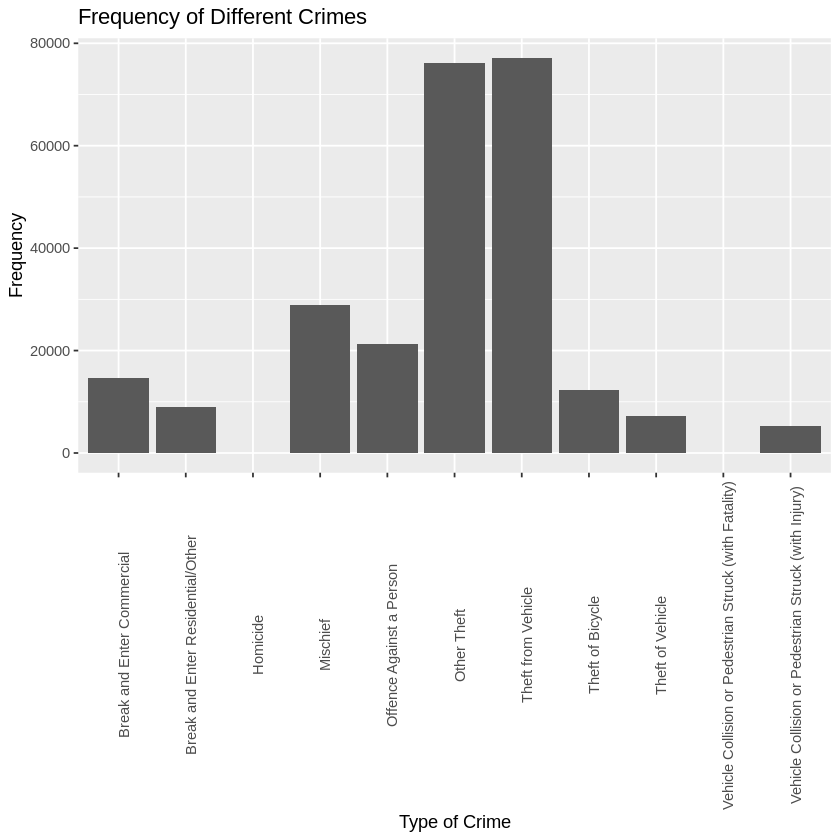

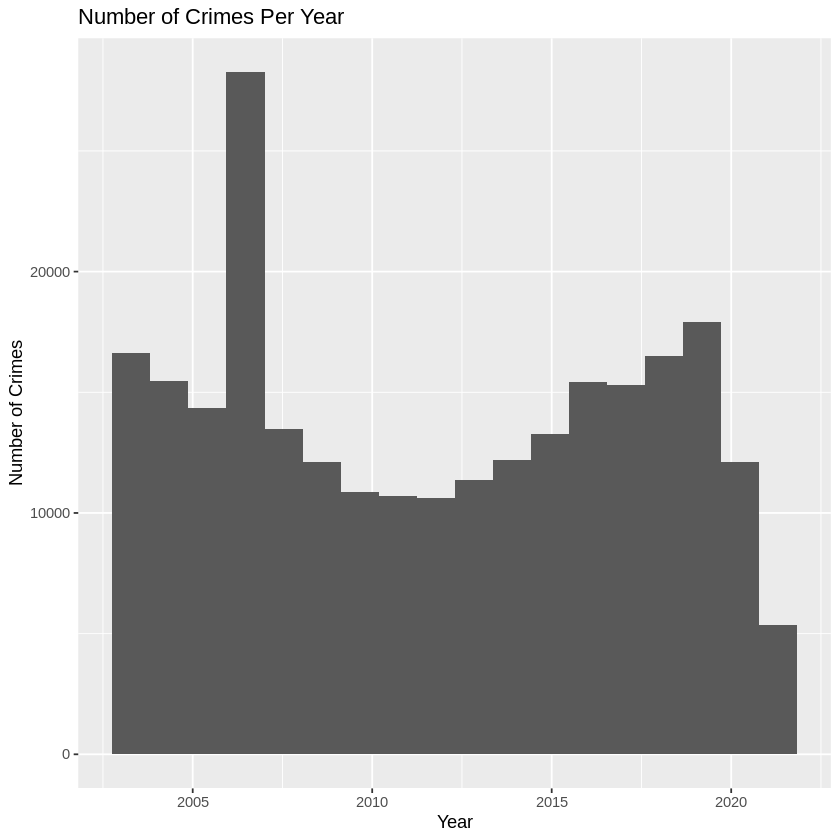

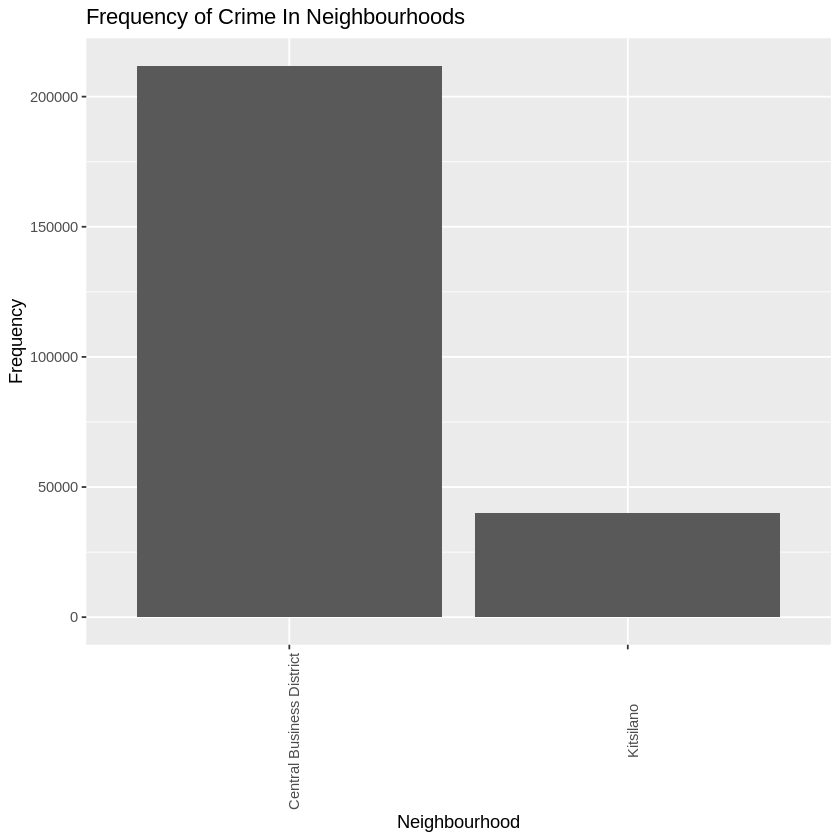

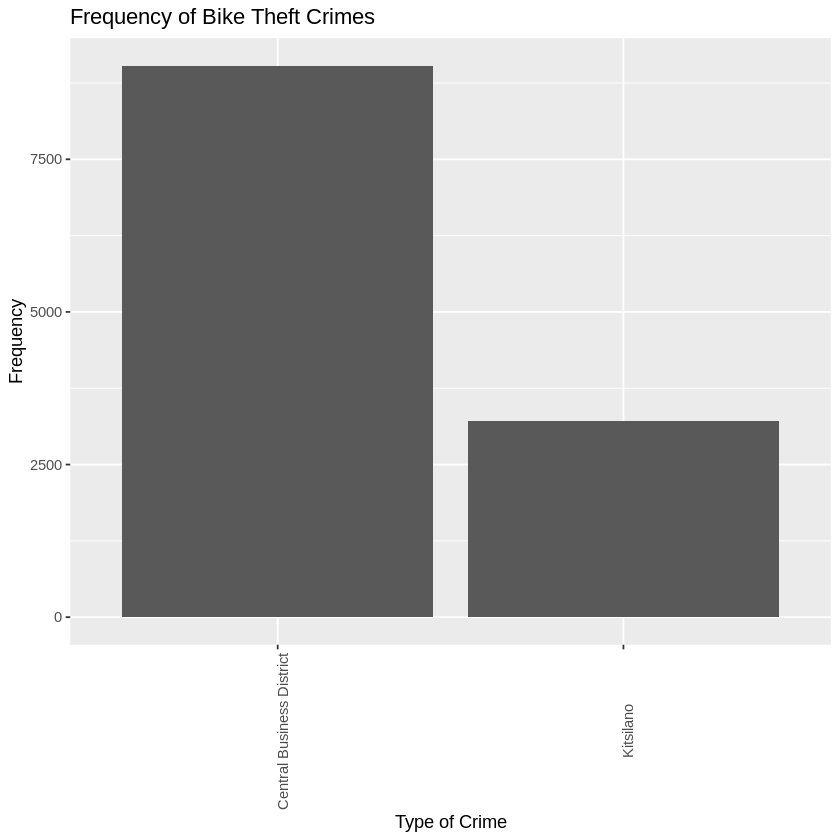

In [17]:
year_plot <- crime_data_clean %>% ggplot() + geom_histogram(aes(x = YEAR), bins = 18) + labs(title = "Number of Crimes Per Year",
         x = "Year", y = "Number of Crimes")
crime_count <- crime_data_clean %>% group_by(TYPE) %>% summarize(Count = n())

neighbourhood_count <- crime_data_clean %>% group_by(NEIGHBOURHOOD) %>% summarize(Count = n())

Bike_Plot <- crime_data_clean %>% filter(TYPE == "Theft of Bicycle") %>% group_by(NEIGHBOURHOOD) %>% summarize(count = n())%>%
   ggplot() + geom_col(aes(x = NEIGHBOURHOOD, y = count)) + labs(title = "Frequency of Bike Theft Crimes",
         x = "Type of Crime", y = "Frequency") + theme(axis.text.x = element_text(angle = 90))

crime_count_plot <- crime_count %>% ggplot() + geom_col(aes(x = TYPE, y = Count)) + labs(title = "Frequency of Different Crimes",
         x = "Type of Crime", y = "Frequency") + theme(axis.text.x = element_text(angle = 90))

neighbourhood_count_plot <- neighbourhood_count %>% ggplot() + geom_col(aes(x = NEIGHBOURHOOD, y = Count)) + labs(title = "Frequency of Crime In Neighbourhoods",
         x = "Neighbourhood", y = "Frequency") + theme(axis.text.x = element_text(angle = 90))

print(crime_count_plot)
print(year_plot)
print(neighbourhood_count_plot)
print(Bike_Plot)

**Sampling**

In [31]:
n = crime_data_clean %>% summarize(n = n())
n
# Sample 
sample = crime_data_clean %>% infer::rep_sample_n(size = 25000)
head(sample)

sample_2003_2010_CBD = sample %>% filter(YEAR >= 2003 & YEAR <= 2010 & NEIGHBOURHOOD == 'Central Business District')

sample_2011_2018_CBD = sample %>% filter(YEAR >= 2011 & YEAR <= 2018 & NEIGHBOURHOOD == 'Central Business District')

sample_2003_2010_kits = sample %>% filter(YEAR >= 2003 & YEAR <= 2010 & NEIGHBOURHOOD == 'Kitsilano')

sample_2011_2018_kits = sample %>% filter(YEAR >= 2011 & YEAR <= 2018 & NEIGHBOURHOOD == 'Kitsilano')

head(sample_2011_2018_kits)

# # Grouping by Year and TYpe
# crimes_per_year_type = sample %>% group_by(YEAR, TYPE) %>% summarize(n = n())
# print(crimes_per_year_type)

# # Grouping by year and neighbourhood
# crimes_per_year_neighbourhood = sample %>% group_by(YEAR, NEIGHBOURHOOD) %>%
#  summarize(n = n()) %>%
#  mutate(prop = n/sum(n))


# head(crimes_per_year_neighbourhood)
# crimes_per_type = sample %>% group_by(TYPE) %>% summarize(n = n()) 
# print(head(crimes_per_type))

# crimes_per_neighbourhood = sample %>% group_by(NEIGHBOURHOOD) %>% summarize(n = n())
# print(head(crimes_per_neighbourhood))





n
<int>
251914


replicate,TYPE,YEAR,NEIGHBOURHOOD
<int>,<chr>,<dbl>,<chr>
1,Mischief,2015,Central Business District
1,Theft of Vehicle,2017,Central Business District
1,Theft of Vehicle,2003,Kitsilano
1,Mischief,2016,Central Business District
1,Other Theft,2015,Central Business District
1,Theft from Vehicle,2009,Central Business District


replicate,TYPE,YEAR,NEIGHBOURHOOD
<int>,<chr>,<dbl>,<chr>
1,Mischief,2017,Kitsilano
1,Offence Against a Person,2018,Kitsilano
1,Offence Against a Person,2014,Kitsilano
1,Break and Enter Residential/Other,2016,Kitsilano
1,Theft from Vehicle,2017,Kitsilano
1,Other Theft,2011,Kitsilano


**Initial Proportion Calculation**

In [42]:
kits_2003_2010_n = sample_2003_2010_kits %>% group_by(TYPE) %>% summarize(n = n())
kits_2011_2018_n = sample_2011_2018_kits %>% group_by(TYPE) %>% summarize(n = n())
CBD_2003_2010_n = sample_2003_2010_CBD %>% group_by(TYPE) %>% summarize(n = n())
CBD_2011_2018_n = sample_2011_2018_CBD %>% group_by(TYPE) %>% summarize(n = n())
# head(kits_2003_2010_n)
# head(kits_2011_2018_n)
# head(CBD_2003_2010_n)
# head(CBD_2011_2018_n)


#The proportion of total crimes in Kitsilano from 2003-2010 that were Bicycle theft
total_crimes_kits_2003 = sum(kits_2003_2010_n$n)
bike_theft_kits_2003 = kits_2003_2010_n %>% filter(TYPE == 'Theft of Bicycle')
kits_2003_2010_prop = bike_theft_kits_2003$n/total_crimes_kits_2003
print("Proportion of Crime in Kitsilano That was Bike Theft from 2003-2010:")
kits_2003_2010_prop


#Proportion for kits 2011 to 2018
total_crimes_kits_2011 = sum(kits_2011_2018_n$n)
bike_theft_kits_2011 = kits_2011_2018_n %>% filter(TYPE == 'Theft of Bicycle')
kits_2010_2018_prop = bike_theft_kits_2011$n/total_crimes_kits_2011
print("Proportion of Crime in Kitsilano That was Bike Theft from 2011-2018:")
kits_2010_2018_prop


#Proportions for CBD 2003 to 2010
total_crimes_CBD_2003 = sum(CBD_2003_2010_n$n)
bikes_theft_CBD_2003 = CBD_2003_2010_n %>% filter(TYPE == 'Theft of Bicycle')
CBD_prop_2003 = bikes_theft_CBD_2003$n/total_crimes_CBD_2003
print("Proportion of Crime in the Central Business District that was Bike Theft from 2003-2010:")
CBD_prop_2003


#proportions for CBD 2011 to 2018
total_crimes_CBD_2011 = sum(CBD_2003_2010_n$n)
bikes_theft_CBD_2011 = CBD_2011_2018_n %>% filter(TYPE == 'Theft of Bicycle')
CBD_prop_2011 = bikes_theft_CBD_2011$n/total_crimes_CBD_2011
print("Proportion of Crime in the Central Business District that was Bike Theft from 2011-2018:")
CBD_prop_2011


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Proportion of Crime in Kitsilano That was Bike Theft from 2003-2010:"


[1] 0.0579096

[1] "Proportion of Crime in Kitsilano That was Bike Theft from 2011-2018:"


[1] 0.0971937

[1] "Proportion of Crime in the Central Business District that was Bike Theft from 2003-2010:"


[1] 0.03428122

[1] "Proportion of Crime in the Central Business District that was Bike Theft from 2011-2018:"


[1] 0.05440036

**Methods**
In what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval, with at least one of these being calculated using both bootstrapping and asymptotics for comparison.
**The initial estimates here are not trustworthy because they are based only on point estimates from our sample. It is possible that while our point estimates are different they are not different enough to believe that the actual population parameters are truly different. We would still need to perform hypothesis testing to determine our confidence level that the true proportions are different (I'm not sure if this makes sense/is true)-Nic**

What do you expect to find? 

We expect to find that certain crimes such as assault may have increased over time while others may have decreased. We also expect the total number of crimes to increase over the years. ← mention neighbourhood predictions

**for the bike crime question I would expect bike crimes as a proportion of total crime to be different across different neighbourhoods -Nic**

What impact could such findings have?

The results of this project could help inform the police on how to allocate their resources the most effectively (i.e., have higher staff in X neighbourhood). Our results may indicate which crimes are becoming more frequent in specified neighbourhoods, information that the Vancouver Police Department could use to strategically schedule staff based on their abilities and experiences. 

**Impact for the bike crime as a proportion of crime could something similar to this - it could inform police resource allocation and city budget allocation. For example installing more cameras and bike racks in certain locations or installing bike cage rentals in certain locations -Nic**

What future questions could this lead to? 

A future question this project could inform is “Why has the occurrence of crime x increased/decreased over time?” 

**Similarily it could inform the question of why is bike crime greater/lesser/same in this area versus other areas? -Nic**

**References**

(1)The Canadian Press. (2020, September 17). Vancouver police record increase in violent crime, decrease in property crime in the first half of 2020. CBCnews. https://www.cbc.ca/news/canada/british-columbia/vancouver-police-increase-violent-crime-decrease-property-crime-1.5728664.

(2)Uguen-Csenge, E. (2021, June 27). Here's what happened to crime rates in Vancouver during the pandemic | CBC News. CBCnews. https://www.cbc.ca/news/canada/british-columbia/here-s-what-happened-to-crime-rates-in-vancouver-during-the-pandemic-1.6078015.